## ML Zoomcamp Homework Week 2 - Linear Regression


In [1]:
import pandas as pd
import numpy as np

In [144]:
def get_data(csv):
    df = pd.read_csv('housing.csv.2')
    df = df[(df['ocean_proximity']=='<1H OCEAN')|(df['ocean_proximity']=='INLAND')]
    del df['ocean_proximity']
    return df

def shuffle(random_seed, df):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)
    df = df.iloc[idx]
    df = df.reset_index(drop=True)
    return df

def test_train_split(df):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[n_train+n_val:]
    df_full_train = df_train + df_val
    return df_train, df_val, df_test, df_full_train
  

In [60]:
df = get_data('housing.csv.2')


In [61]:
df.shape

(15687, 9)

In [62]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

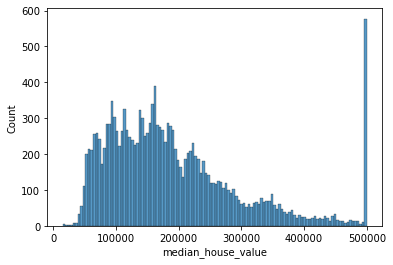

In [63]:
sns.histplot(df.median_house_value, bins=120)

##### Question 1
There's one feature with missing values. What is it?

In [64]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Question 2
What's the median (50% percentile) for variable 'population'?

In [65]:
df.population.median()

1195.0

In [66]:
df = shuffle(42, df)

In [68]:
df_train, df_val, df_test, df_full_train = test_train_split(df)

In [69]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [70]:
median_house_value_logs = np.log1p(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

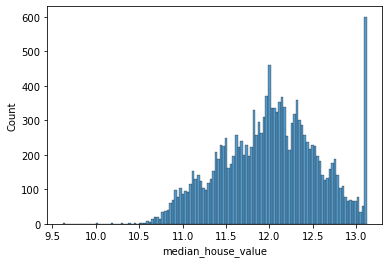

In [71]:
sns.histplot(median_house_value_logs, bins=120)

#### Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


In [72]:
df.total_bedrooms.mean()

541.2446877012235

In [73]:
df_mean_train = df_train.fillna(df_train.total_bedrooms.mean())
df_mean_val = df_val.fillna(df_train.total_bedrooms.mean())

In [74]:
df_mean_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [75]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [76]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [77]:
df_mean_train.total_bedrooms.mean()

542.5529563257869

In [78]:
df_train.total_bedrooms.mean()

537.1349197917773

In [80]:
y_mean_train = np.log1p(df_mean_train.median_house_value.values)
y_mean_val = np.log1p(df_mean_val.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)


In [ ]:
del df_mean_train['median_house_value']
del df_mean_val['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']

### Fill with mean

In [84]:
df_mean_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [85]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [168]:
df_mean_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [107]:
X_mean = np.array(df_mean_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']])


In [108]:
train_linear_regression(X_mean, y_train)

(-9.886133219209944,
 array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [109]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [111]:
w0, w = train_linear_regression(X_mean, y_train)

In [174]:
w0

-9.886133219209944

In [175]:
w

array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
        3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01])

In [113]:
y_mean_pred = w0 + X_mean.dot(w)

In [114]:
y_mean_pred

array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
       11.93466055, 12.11281089])

In [115]:
rmse(y_mean_train, y_mean_pred).round(2)

0.34

### Validate mean

In [116]:
#X_train = prepare_X(df_train)
#w0, w = train_linear_regression(X_train, y_train)

X_val = np.array(df_mean_val[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])
y_mean_pred = w0 + X_val.dot(w)
rmse(y_val, y_mean_pred).round(2)

0.34

### Fill with zeros

In [119]:
X_train = np.array(df_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [120]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [121]:
train_linear_regression(X_train, y_train)

(-9.763249480814824,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766353e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [123]:
w0, w = train_linear_regression(X_train, y_train)

In [125]:
y_zero_pred = w0 + X_train.dot(w)

In [127]:
rmse(y_train, y_zero_pred).round(2)

0.34

### Validate Zeros

In [129]:
X_val = np.array(df_val[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])
y_zero_pred = w0 + X_val.dot(w)
rmse(y_val, y_zero_pred).round(2)

0.34

### Regularized LR - using fillna(0)

In [130]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [131]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
Scores = []
for i in r:    
    w0, w = train_linear_regression_reg(X_train, y_train, i)

    y_pred = w0 + X_val.dot(w)
    Error = rmse(y_val, y_pred).round(2)
    Scores.append(Error)
    print('RMSE = ' + str(Error) + '  r = ' + str(i))

RMSE = 0.34  r = 0
RMSE = 0.34  r = 1e-06
RMSE = 0.34  r = 0.0001
RMSE = 0.34  r = 0.001
RMSE = 0.34  r = 0.01
RMSE = 0.34  r = 0.1
RMSE = 0.34  r = 1
RMSE = 0.35  r = 5
RMSE = 0.35  r = 10


### Different randomization

In [188]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for i in seeds:    
    df = pd.read_csv('housing.csv.2')
    df = df[(df['ocean_proximity']=='<1H OCEAN')|(df['ocean_proximity']=='INLAND')]
    del df['ocean_proximity']
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    df = df.iloc[idx]
    df = df.reset_index(drop=True)
    df = df.fillna(0)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[n_train+n_val:]

    X_train = np.array(df_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']])
    X_val = np.array(df_val[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']])
    X_test = np.array(df_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']])

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    error = rmse(y_val, y_pred).round(2)
    scores.append(error)
    print('RMSE = ' + str(error) + '  seed ' + str(i))
                  
    
    

RMSE = 0.34  seed 0
RMSE = 0.34  seed 1
RMSE = 0.34  seed 2
RMSE = 0.33  seed 3
RMSE = 0.34  seed 4
RMSE = 0.34  seed 5
RMSE = 0.34  seed 6
RMSE = 0.35  seed 7
RMSE = 0.35  seed 8
RMSE = 0.33  seed 9


In [189]:
np.std(scores).round(4)

0.0063

#### Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43




In [223]:
df = pd.read_csv('housing.csv.2')
df = df[(df['ocean_proximity']=='<1H OCEAN')|(df['ocean_proximity']=='INLAND')]
del df['ocean_proximity']
idx = np.arange(n)
np.random.seed(i)
np.random.shuffle(idx)
df = df.iloc[idx]
df = df.reset_index(drop=True)
df = df.fillna(0)
n_test = int(n * 0.2)
n_full_train = n - n_test
df_full_train = df.iloc[:n_full_train]
df_test = df.iloc[n_full_train:]  


In [224]:
df_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.05,32.82,16.0,4046.0,731.0,1684.0,701.0,4.2312,197000.0
1,-118.00,33.91,19.0,5166.0,770.0,2374.0,753.0,5.9790,285200.0
2,-121.96,37.25,35.0,1018.0,169.0,484.0,174.0,6.1648,371900.0
3,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,283300.0
4,-118.14,33.96,34.0,2744.0,541.0,1333.0,503.0,4.0536,277200.0
...,...,...,...,...,...,...,...,...,...
12545,-121.14,38.92,16.0,2069.0,312.0,889.0,299.0,4.6771,212000.0
12546,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,101800.0
12547,-116.99,32.85,32.0,5211.0,949.0,3025.0,948.0,4.0931,134200.0
12548,-122.68,38.48,15.0,1575.0,262.0,716.0,259.0,5.3409,244600.0


In [225]:
X_full_train = np.array(df_full_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']])
y_full_train = np.log1p(df_full_train.median_house_value.values)


In [226]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)

In [227]:
y_pred = w0 + X_full_train.dot(w)
rmse(y_full_train, y_pred).round(8)

0.33931757